## KMeans
- 聚类，无监督学习，每个样本无标签
- 过程：不断地聚类<-->划分过程
    1. 对于一组数据集，随机选取k个点作为质心，将数据集中的点归为离其最近的质心一簇，此时数据集被划分为k个簇；
    2. 对这k个簇，重新计算各簇的质心(均值)；
    3. 根据新的质心，按照step1继续聚类，然后再根据聚类重新计算各簇质心，直到质心不再改变，分类完成。   
- KMeans缺点:
    1. 簇数量k由用户指定，无法预先知道最佳k值 >> 解法：分为几簇，最终由轮廓系数S(i)决定，取轮廓系数最大的分类数
    2. 最终质心与初始点选择有关 >> 因此KMeans的结果可能收敛到局部最小值，而不是全局最小值 >> 解法：
        - biKMeans（见下）
        - KMeans++（KMeans++ 算法在选择初始质心时并不是随机选择，而是选择尽量相互分离的质心，即，下一个质心点总是离上一个质心点较远的点）

In [170]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
%config InlineBackend.figure_format="retina"

#设置出图显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [54]:
def loadDataSet(fileName):
    dataList=[]
    dataMat=[]
    fr=open(fileName)
    for line in fr.readlines():
        curLine=line.strip().split('\t')
        fltLine=list(map(float,curLine))
        dataList.append(fltLine)
        dataMat=mat(dataList)
    return dataMat

def distEclud(vecA,vecB):
    return sqrt(sum(power(vecA-vecB,2))) #欧式距离

#为输入数据集构造k个随机中心，中心位置在各特征最大最小值之间
def randCent(dataSet,k):
    n=shape(dataSet)[1]
    center=mat(zeros((k,n)))
    for j in range(n): #对每个特征
        minJ=min(dataSet[:,j])
        rangeJ=float(max(dataSet[:,j])-minJ)
        center[:,j]=mat(minJ+rangeJ*random.rand(k,1)) #质心第j维坐标在数据集第j维数据之间
    return center

In [58]:
dataMat1=loadDataSet(r'D:\DM\python\data\MLiA_SourceCode\machinelearninginaction\Ch10\testSet.txt')
print(dataMat1[:,1][:5])
center1=randCent(dataMat1,3)
print(center1)
print(distEclud(center1[0],center1[1]))

[[ 4.285136]
 [ 3.424321]
 [-1.151539]
 [-3.362104]
 [ 2.924086]]
[[-4.19045706 -2.48921536]
 [ 4.48005003  4.02706656]
 [-2.41098837  3.82719055]]
10.846180122924467


In [91]:
def KMeans(dataSet,k,distMeas=distEclud,createCent=randCent):
    m=shape(dataSet)[0] 
    clusterAssment=mat(zeros((m,2))) #用于记录各样本当前归属于哪个簇以及到该簇质心的欧式距离平方
    center=createCent(dataSet,k)
    clusterChanged=True
    
    while clusterChanged:
        clusterChanged=False     
        #对每个样本，计算样本到各质心的距离，寻找距离最近的质心，将该样本归为该质心所在簇
        for i in range(m): 
            minDist=inf;minIndex=-1
            for j in range(k): #对每个质心,计算到i样本的距离
                distJI=distMeas(center[j,:],dataSet[i,:])
                if distJI<minDist:
                    minDist=distJI;minIndex=j #i样本暂属于j簇，到j簇质心距离为minDist
            if clusterAssment[i,0]!=minIndex:
                clusterChanged=True #若任一样本在本次迭代中改变了簇类，则要进行下一次迭代(即，直到任何样本都不再改变簇类，聚类停止)
            clusterAssment[i,:]=minIndex,minDist**2 #记录样本i的簇类情况
        #print (center)
        #更新质心
        for cent in range(k):
            ptsInClust=dataSet[nonzero(clusterAssment[:,0].A==cent)[0]] #筛选出属于当前簇类的点
            center[cent,:]=mean(ptsInClust,axis=0) #对该簇类各样本的各列求均值，作为新质心
    return center,clusterAssment

In [141]:
dataMat1=loadDataSet(r'D:\DM\python\data\MLiA_SourceCode\machinelearninginaction\Ch10\testSet.txt')
dataMat2=loadDataSet(r'D:\DM\python\data\MLiA_SourceCode\machinelearninginaction\Ch10\testSet2.txt')
center_testSet1,clusterAssment_testSet1=KMeans(dataMat1,4)
center_testSet2,clusterAssment_testSet2=KMeans(dataMat2,3)
print('center1','\n',center_testSet1)
print('10 samples cluster1','\n',clusterAssment_testSet1[:9])

center1 
 [[ 2.6265299   3.10868015]
 [ 2.65077367 -2.79019029]
 [-2.46154315  2.78737555]
 [-3.53973889 -2.89384326]]
10 samples cluster1 
 [[0.         2.3201915 ]
 [2.         1.39004893]
 [1.         7.46974076]
 [3.         3.60477283]
 [0.         2.7696782 ]
 [2.         2.80101213]
 [1.         5.10287596]
 [3.         1.37029303]
 [0.         2.29348924]]


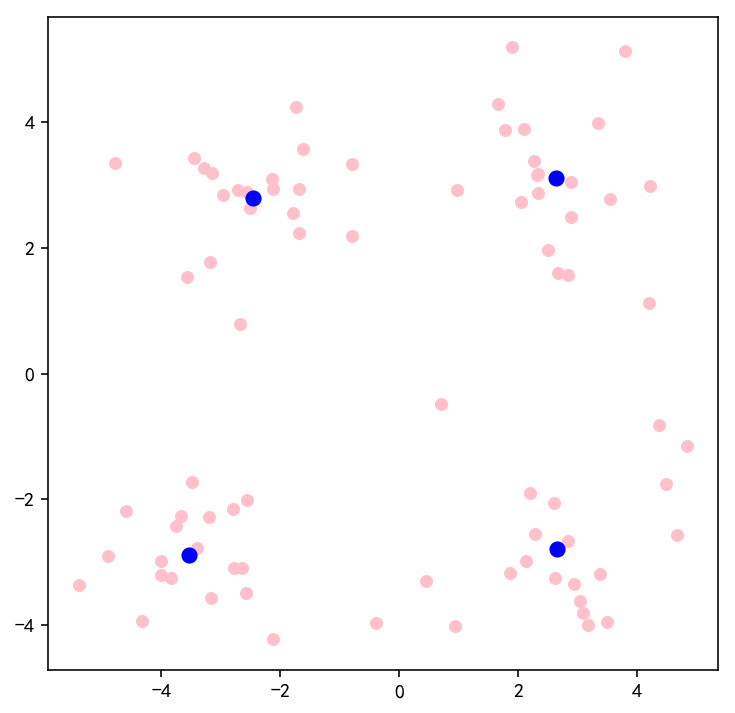

In [147]:
plt.figure(figsize=(6,6))
plt.scatter(dataMat1[:,0].T.tolist()[0],dataMat1[:,1].T.tolist()[0],c='pink',s=30)
plt.scatter(center_testSet1.T[0].tolist()[0],center_testSet1.T[1].tolist()[0],c='blue',s=50)

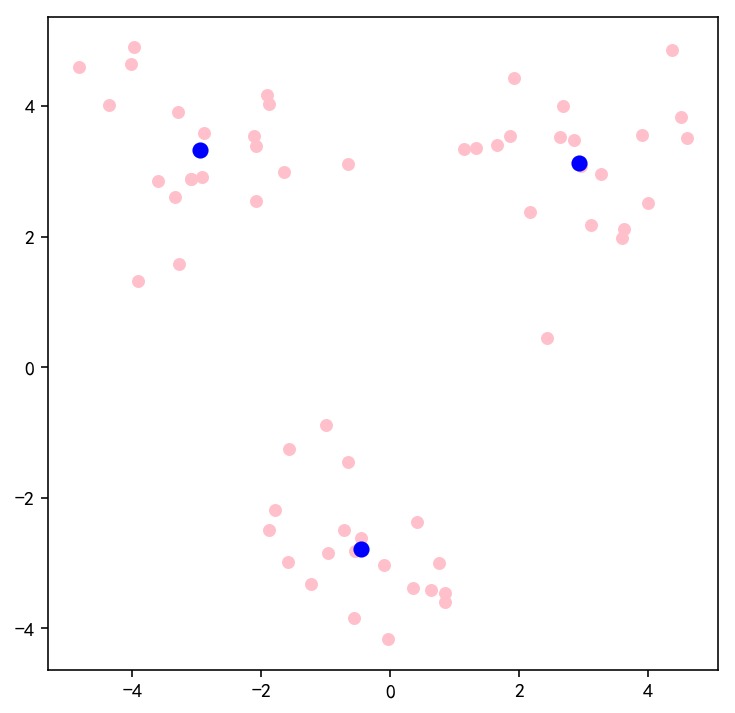

In [149]:
plt.figure(figsize=(6,6))
plt.scatter(dataMat2[:,0].T.tolist()[0],dataMat2[:,1].T.tolist()[0],c='pink',s=30)
plt.scatter(center_testSet2.T[0].tolist()[0],center_testSet2.T[1].tolist()[0],c='blue',s=50)

## BiKMeans
- **KMeans的改进算法，为了解决随机选取初始质心而无法到达全局最优解的情况**
- 过程：
    1. 将整个数据集看作一个簇，计算初始质心，即所有数据点各特征的均值
    2. 遍历各质心，对各质心，将质心所在簇用原始KMeans算法二分，计算二分后整个数据集的SSE(即平方误差和，即簇各点到簇质心距离平方和)，找到二分后整体数据集SSE最小的质心，认为此质心是本次划分的最佳质心，对其进行二分
    3. 不断重复step2，直到质心总数=设置的k
- BiKMeans算法过程类似于决策树的分支，**通过启发的方法，每次迭代只分裂当前最佳质心，直到簇数量达到k**，这样的方法可以保证最终划分得到的质心是全局最优解，而原始KMeans可能会陷入局部最优解(比如有100个簇要划分)
- **BiKMean缺点：**人工设定k值

In [365]:
def biKMeans(dataSet,k,distMeas=distEclud):
    m=shape(dataSet)[0]
    clusterAssment=mat(zeros((m,2))) #记录各样本归属和距离平方
    center0=mean(dataSet,axis=0).tolist()[0] #初始质心
    centerList=[center0] #用于记录聚类质心坐标
    for j in range(m):
        clusterAssment[j,1]=distMeas(mat(center0),dataSet[j,:])**2
    while len(centerList)<k:
        lowestSSE=inf #SSE=Sum of Square Error
        #对每个簇，尝试二分，计算二分后整体数据的SSE，若小于lowestSSE，则将簇二分，如此往复，直到分到k个簇为止
        for i in range(len(centerList)):
            ptsInCluster=dataSet[nonzero(clusterAssment[:,0].A==i)[0],:] #默认质心索引就是数据对应簇类
            centerMat,splitClustAss=KMeans(ptsInCluster,2,distMeas)
            sseSplit=sum(splitClustAss[:,1]) #被二分后的簇的平方误差和
            sseNotSplit=sum(clusterAssment[nonzero(clusterAssment[:,0]!=i)[0],1]) #整体数据中，未被二分的簇的平方误差和
            if (sseSplit+sseNotSplit)<lowestSSE:
                bestCentToSplit=i
                bestNewCents=centerMat
                bestClustAss=splitClustAss.copy() #.copy()防止splitClustAss被覆盖时影响到bestClustAss
                lowestSSE=sseSplit+sseNotSplit
        #确定好本次迭代被二分的簇后，将被二分的数据对应的簇类更新
        bestClustAss[nonzero(bestClustAss[:,0].A!=0)[0],0]=len(centerList) #更新先后顺序很重要！
        bestClustAss[nonzero(bestClustAss[:,0].A==0)[0],0]=bestCentToSplit
        print('The bestCentToSplit is:',bestCentToSplit)
        print('The number of samples to split is',len(bestClustAss))
        centerList[bestCentToSplit]=bestNewCents[0,:].tolist()[0] #将被二分的原簇质心替换为二分后的质心之一
        centerList.append(bestNewCents[1,:].tolist()[0]) #将二分后的另一质心添加在质心列表末尾
        #将二分后的簇的数据归属更新到总记录中
        clusterAssment[nonzero(clusterAssment[:,0].A==bestCentToSplit)[0],:]=bestClustAss
    return mat(centerList),clusterAssment

In [269]:
center_testSet22,clusterAssment_testSet22=biKMeans(dataMat2,3)
print('center22','\n',center_testSet22)
print('10 samples cluster22','\n',clusterAssment_testSet22[:10])

The bestCentToSplit is: 0
The number of samples to split is 60
The bestCentToSplit is: 1
The number of samples to split is 40
center22 
 [[-0.45965615 -2.7782156 ]
 [-2.94737575  3.3263781 ]
 [ 2.93386365  3.12782785]]
10 samples cluster22 
 [[2.         0.14546105]
 [1.         0.68021383]
 [0.         1.02184582]
 [2.         1.3454876 ]
 [1.         1.35376464]
 [0.         3.87167519]
 [2.         0.83725995]
 [1.         0.22011627]
 [0.         3.53809057]
 [2.         7.4408116 ]]


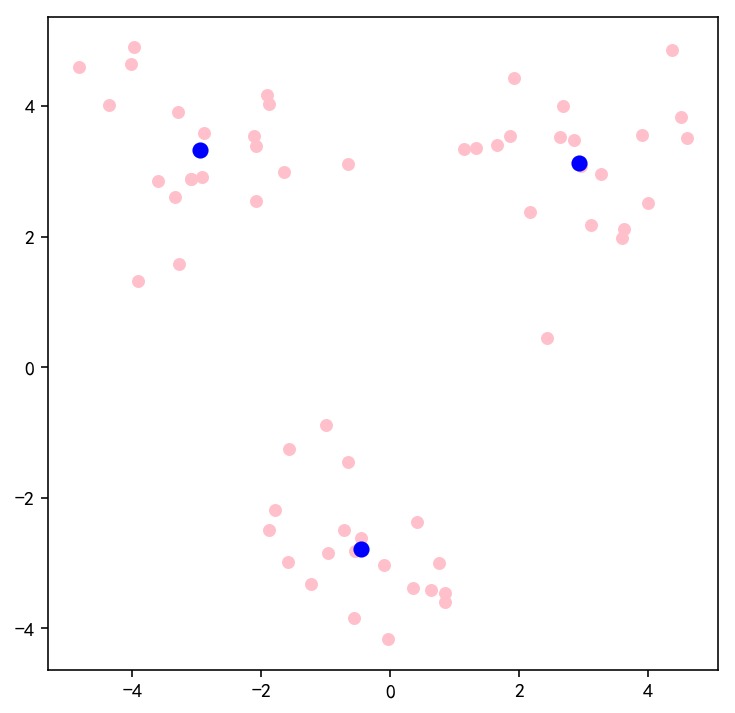

In [200]:
plt.figure(figsize=(6,6))
plt.scatter(dataMat2[:,0].T.tolist()[0],dataMat2[:,1].T.tolist()[0],c='pink',s=30)
plt.scatter(center_testSet22.T[0].tolist()[0],center_testSet22.T[1].tolist()[0],c='blue',s=50)

- **使用改进后的KMeans(二分KMeans算法)，聚类结果会逐步收敛到最小值，而原始的KMeans算法偶尔会陷入局部最小值中**

## 实例：地址聚类
- **现在要去接69个地址的客人，为了提高效率，需要将这些地址聚类找到每簇地址的质心，然后在质心接人即可**
- 步骤：
    1. 通过调用YaHoo Api，获取城市名+街道地址的经纬度
    2. 利用经纬度进行聚类，这里要注意，经纬度是球面上的，如何衡量球面距离？
        - 球面余弦距离(向量夹角\*地球半径)：设所求点A ，纬度角β1 ，经度角α1 ；点B ，纬度角β2 ，经度角α2。则球面距离**S=R·arc cos[cosβ1cosβ2cos（α1-α2）+sinβ1sinβ2]**，其中R为球体半径。
- 思考：设置几个质心是最合理的？
    - **最佳k值由轮廓系数S(i)决定，取轮廓系数最大的分类数**

In [165]:
import urllib
import json
from time import sleep

#调用YaHoo Api，获取一个城市名+街道地址的经纬度
def geoGrab(stAddress, city):
    apiStem = "http://where.yahooapis.com/geocode?"  #create a dict and constants for the geocoder
    params = {}
    params['flags'] = "J"#JSON return type
    params['appid'] = "aaa0VN6k"
    params['location'] = "%s %s" % (stAddress, city)
    url_params = urllib.parse.urlencode(params)
    yahooApi = apiStem + url_params      #print url_params
    print(yahooApi)
    c=urllib.request.urlopen(yahooApi)
    return json.loads(c.read())

#批量处理地址信息，返回批量经纬度数据存入地址表
def massPlaceFind(fileName):
    fw = open('places.txt', 'w')
    for line in open(fileName).readlines():
        line = line.strip()
        lineArr = line.split('\t')
        retDict = geoGrab(lineArr[1], lineArr[2])
        if retDict['ResultSet']['Error'] == 0:
            lat = float(retDict['ResultSet']['Results'][0]['latitude'])
            lng = float(retDict['ResultSet']['Results'][0]['longitude'])
            print ("%s\t%f\t%f" % (lineArr[0], lat, lng))
            fw.write('%s\t%f\t%f\n' % (line, lat, lng))
        else: print ("error fetching")
        sleep(1)
    fw.close()

In [167]:
# 注意：需要注册以获取YaHoo Api Key，从而正常使用geoGrab()函数
geoGrab('Dolphin II	10860 SW Beaverton-Hillsdale Hwy	Beaverton','OR')

http://where.yahooapis.com/geocode?flags=J&appid=aaa0VN6k&location=Dolphin+II%0910860+SW+Beaverton-Hillsdale+Hwy%09Beaverton+OR


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [168]:
#球面距离计算函数：球面余弦距离(向量夹角*地球半径)
#求球面上两向量vecA,vecB的距离
def distSLC(vecA,vecB):
    a=sin(vecA[0,1]*pi/180)*sin(vecB[0,1]*pi/180) #由于抓取的经纬度为角度，需要通过 *pi/180来转换为弧度
    b=cos(vecA[0,1]*pi/180)*cos(vecB[0,1]*pi/180)*cos(pi*(vecA[0,0]-vecB[0,0])/180)
    return 6371.0*arccos(a+b) #6371为地球半径，单位为英尺

In [246]:
def clusterClubs(k=5):
    dataList=[]
    for line in open(r'D:\DM\python\data\MLiA_SourceCode\machinelearninginaction\Ch10\places.txt').readlines():
        lineArr=line.strip().split('\t')
        dataList.append([float(lineArr[4]),float(lineArr[3])]) #读取地址的经纬度
    dataMat=mat(dataList)
    center,clusterAss=biKMeans(dataMat,k,distMeas=distSLC) #将地址按经纬度聚类
    #作图
    fig=plt.figure(figsize=(10,8))
    rect=[0.1,0.1,0.8,0.8] #用于设置坐标轴刻度，[]中前两个值表示左边起始位置，后两个值对应坐标长度
    scatterMarkers=['^','o','h','8','p','d','v','s','>','<'] #用于设置散点图点的形状
    axprops=dict(xticks=[],yticks=[])
    ax0=fig.add_axes(rect,label='ax0',**axprops)
    
    #读图，并将图片显示在设定好的坐标轴中
    imgP=plt.imread(r'D:\DM\python\data\MLiA_SourceCode\machinelearninginaction\Ch10\Portland.png')
    ax0.imshow(imgP)
    #将地址按聚类结果作散点图
    ax1=fig.add_axes(rect,label='ax1',frameon=False)
    for i in range(k):
        ptsInCluster=dataMat[nonzero(clusterAss[:,0].A==i)[0],:]
        markerStyle=scatterMarkers[i]
        ax1.scatter(ptsInCluster[:,0].flatten().A[0],ptsInCluster[:,1].flatten().A[0],\
                   marker=markerStyle,s=90)
    #标出质心
    ax1.scatter(center[:,0].flatten().A[0],center[:,1].flatten().A[0],marker='+',s=300)
    plt.show()

The bestCentToSplit is: 0
The number of samples to split is 80
The bestCentToSplit is: 0
The number of samples to split is 46
The bestCentToSplit is: 2
The number of samples to split is 25
The bestCentToSplit is: 0
The number of samples to split is 21


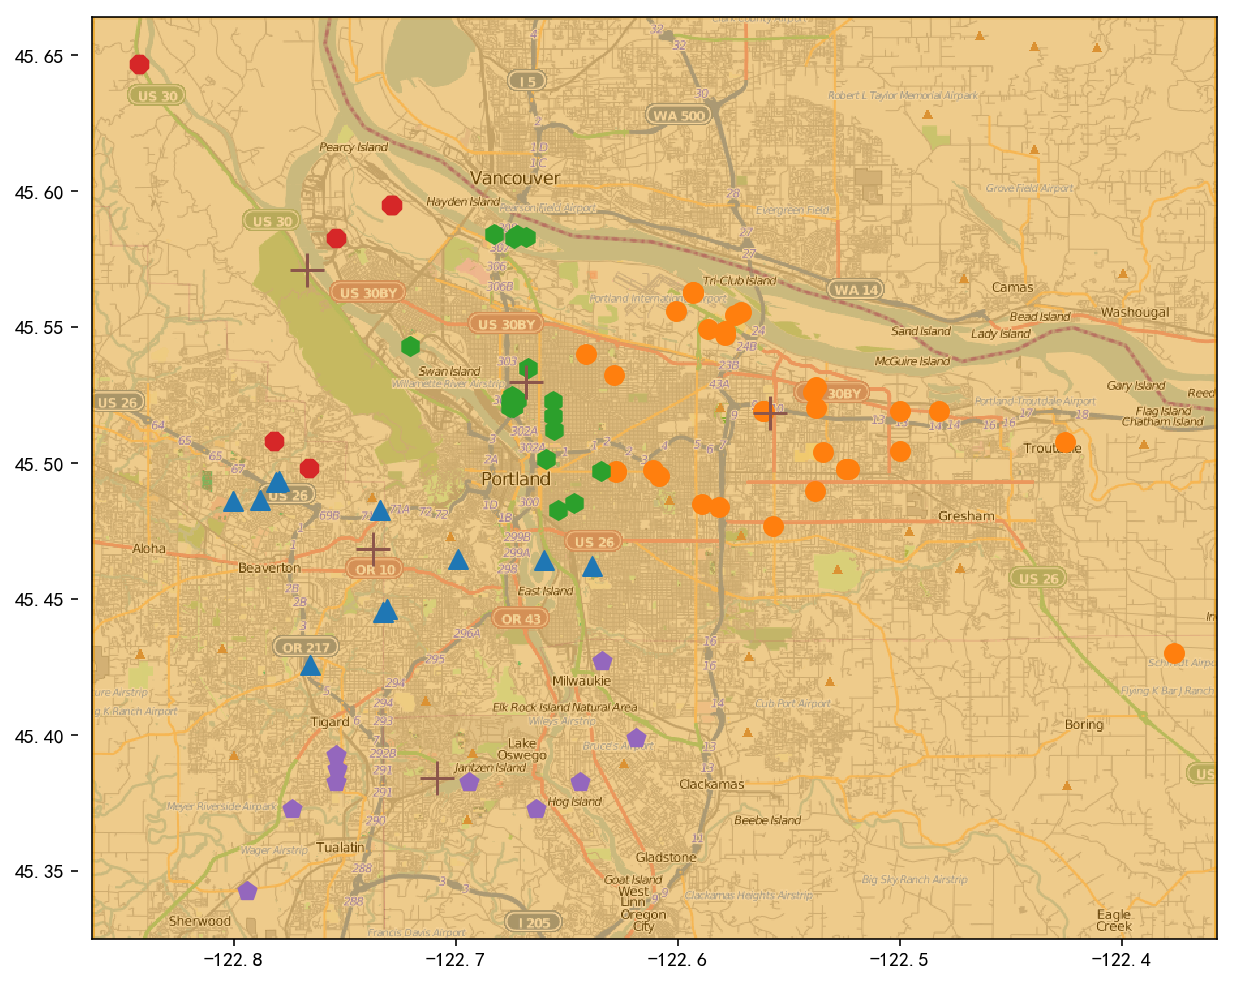

In [270]:
clusterClubs(5)

The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 0
The number of samples to split is 55
The bestCentToSplit is: 1
The number of samples to split is 14
The bestCentToSplit is: 2
The number of samples to split is 35
The bestCentToSplit is: 0
The number of samples to split is 20
The bestCentToSplit is: 5
The number of samples to split is 18
The bestCentToSplit is: 4
The number of samples to split is 14
The bestCentToSplit is: 3
The number of samples to split is 10


E:\ProgramData\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:536: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
E:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


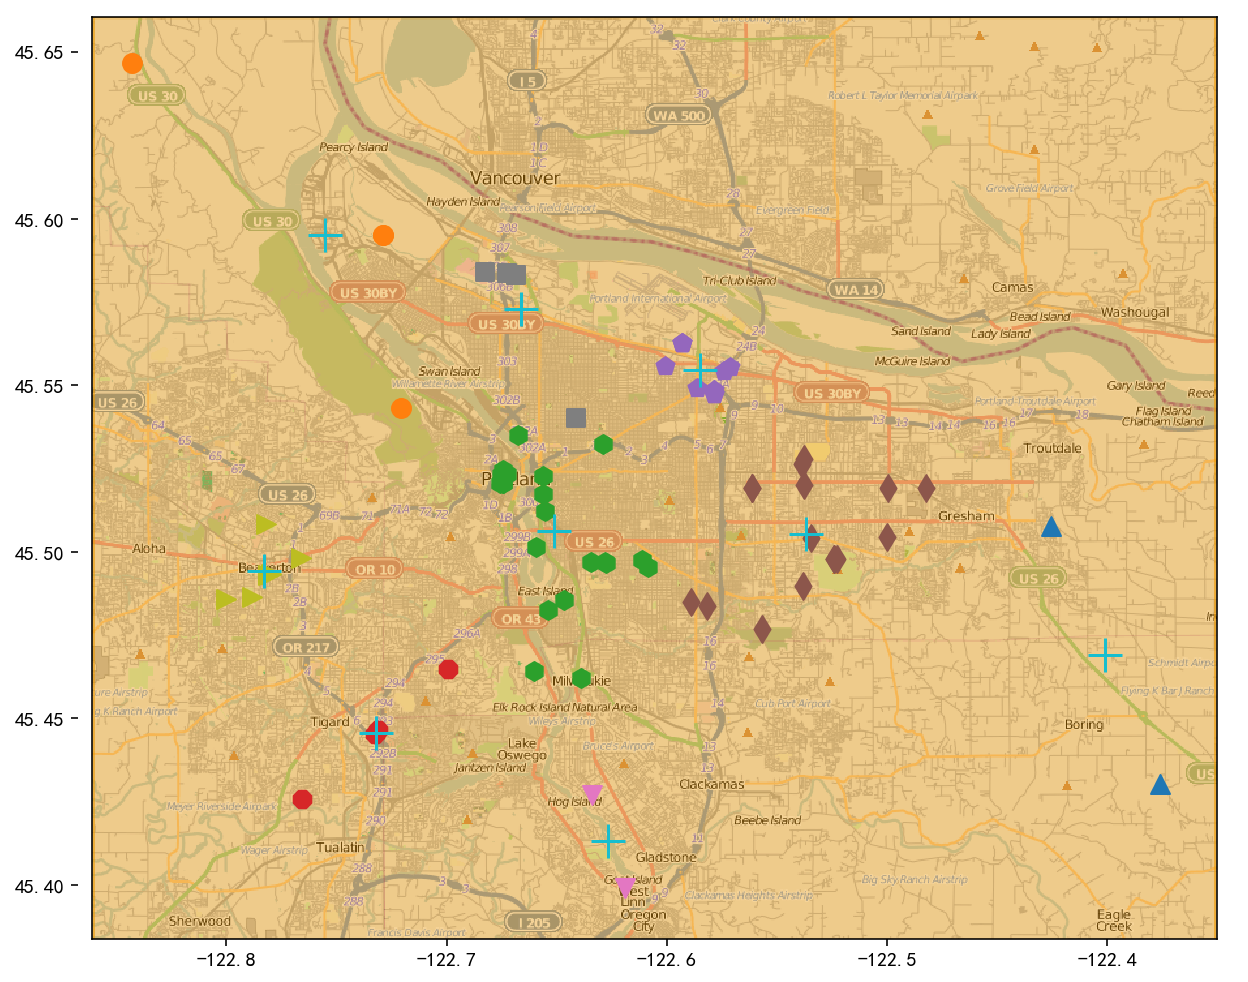

In [335]:
clusterClubs(9)

### 思考：设置几个质心是最合理的？
- **最佳k值由轮廓系数S(i)决定，取轮廓系数最大的分类数**
- S(i)，a(i)=i点到同簇各点距离均值；b(i)=min(i点到某个非同簇各点均值),即i点到其他簇质心距离的最小值，整体数据集的轮廓系数是各点轮廓系数的平均值
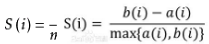

In [366]:
dataList=[]
for line in open(r'D:\DM\python\data\MLiA_SourceCode\machinelearninginaction\Ch10\places.txt').readlines():
    lineArr=line.strip().split('\t')
    dataList.append([float(lineArr[4]),float(lineArr[3])]) #读取地址的经纬度
dataMat=mat(dataList)
#遍历2~nn个质心，求不同数量的簇的轮廓系数，设置轮廓系数最大的簇数量为k值
sk={}
for k in range(2,11):
    center,clusterAss=biKMeans(dataMat,k,distMeas=distSLC)
    outline=[] #代表聚类为k个簇时各点的轮廓系数列表
    for i in range(k): #遍历各簇i
        ptsInCluster=clusterAss[nonzero(clusterAss[:,0].A==i)[0],:]
        for j in range(len(ptsInCluster)): #遍历i簇的各点j
            ptsInClusterNotJ=vstack([ptsInCluster[:j,:],ptsInCluster[j+1:,:]])
            ajn=[]
            for n in range(len(ptsInClusterNotJ)): #遍历i簇非j的点
                ajn.append(distSLC(ptsInCluster[n],ptsInCluster[j]))
            aj=nanmean(ajn)
            bjm=[]
            centerWithoutI=vstack([center[:i,:],center[i+1:,:]])
            for m in range(len(centerWithoutI)): #遍历非i簇质心
                bjm.append(distSLC(centerWithoutI[m],ptsInCluster[j]))
            bj=min(bjm)
            sj=(bj-aj)/max(bj,aj) #i簇中j点的轮廓系数
            outline.append(sj) #将i簇中各点的轮廓系数保存在outline中，outline用于存储聚类为k个簇时各点的轮廓系数，在遍历k时需要重置
    sk[k]=nanmean(outline) #聚类为k个簇时的轮廓系数是各点轮廓系数的均值

The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 0
The number of samples to split is 39
The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 1
The number of samples to split is 39
The bestCentToSplit is:

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  


 1
The number of samples to split is 28
The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 1
The number of samples to split is 30
The bestCentToSplit is: 0
The number of samples to split is 39
The bestCentToSplit is: 0
The number of samples to split is 13
The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 0
The number of samples to split is 38
The bestCentToSplit is: 0
The number of samples to split is 31
The bestCentToSplit is: 1
The number of samples to split is 31
The bestCentToSplit is: 4
The number of samples to split is 14


E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
E:\ProgramData\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:536: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
E:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 1
The number of samples to split is 32
The bestCentToSplit is: 0
The number of samples to split is 37
The bestCentToSplit is: 1
The number of samples to split is 19
The bestCentToSplit is: 0
The number of samples to split is 35
The bestCentToSplit is: 0
The number of samples to split is 24
The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 1
The number of samples to split is 38
The bestCentToSplit is: 2
The number of samples to split is 13
The bestCentToSplit is: 1
The number of samples to split is 25
The bestCentToSplit is: 0
The number of samples to split is 31
The bestCentToSplit is: 0
The number of samples to split is 15
The bestCentToSplit is: 6
The number of samples to split is 14
The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 1
The number of samples to split is 39
The bestCentToSplit is: 2
The number of samples to spli

In [367]:
sk

{2: 0.591620225938954,
 3: 0.6693911500508659,
 4: 0.7314291608783599,
 5: 0.7404467391349461,
 6: 0.8024899130985889,
 7: 0.8761572479413183,
 8: 0.8746312887964484,
 9: 0.9393313059132354,
 10: 0.9586631519567703}

- **测试成功，写成函数，便于下次调用**

In [368]:
def outlineOfCluster(filename,maxClusterNum,distMeas=distEclud):
    dataList=[]
    for line in open(filename).readlines():
        lineArr=line.strip().split('\t')
        dataList.append([float(lineArr[4]),float(lineArr[3])]) #读取地址的经纬度
    dataMat=mat(dataList)
    #遍历2~nn个质心，求不同数量的簇的轮廓系数，设置轮廓系数最大的簇数量为k值
    sk={}
    for k in range(2,maxClusterNum+1):
        center,clusterAss=biKMeans(dataMat,k,distMeas)
        outline=[] #代表聚类为k个簇时各点的轮廓系数列表
        for i in range(k): #遍历各簇i
            ptsInCluster=clusterAss[nonzero(clusterAss[:,0].A==i)[0],:]
            for j in range(len(ptsInCluster)): #遍历i簇的各点j
                ptsInClusterNotJ=vstack([ptsInCluster[:j,:],ptsInCluster[j+1:,:]])
                ajn=[]
                for n in range(len(ptsInClusterNotJ)): #遍历i簇非j的点
                    ajn.append(distSLC(ptsInCluster[n],ptsInCluster[j]))
                aj=nanmean(ajn)
                bjm=[]
                centerWithoutI=vstack([center[:i,:],center[i+1:,:]])
                for m in range(len(centerWithoutI)): #遍历非i簇质心
                    bjm.append(distSLC(centerWithoutI[m],ptsInCluster[j]))
                bj=min(bjm)
                sj=(bj-aj)/max(bj,aj) #i簇中j点的轮廓系数
                outline.append(sj) #将i簇中各点的轮廓系数保存在outline中，outline用于存储聚类为k个簇时各点的轮廓系数，在遍历k时需要重置
        sk[k]=nanmean(outline) #聚类为k个簇时的轮廓系数是各点轮廓系数的均值
    return sk

In [375]:
sk=outlineOfCluster(r'D:\DM\python\data\MLiA_SourceCode\machinelearninginaction\Ch10\places.txt',\
                 35,distMeas=distSLC)

The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 1
The number of samples to split is 39
The bestCentToSplit is:

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
E:\ProgramData\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:536: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
E:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


 0
The number of samples to split is 69
The bestCentToSplit is: 1
The number of samples to split is 39
The bestCentToSplit is: 0
The number of samples to split is 30
The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 0
The number of samples to split is 39
The bestCentToSplit is: 2
The number of samples to split is 13
The bestCentToSplit is: 0
The number of samples to split is 26
The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 1
The number of samples to split is 39
The bestCentToSplit is: 1
The number of samples to split is 33
The bestCentToSplit is: 1
The number of samples to split is 25
The bestCentToSplit is: 0
The number of samples to split is 30
The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 0
The number of samples to split is 39
The bestCentToSplit is: 2
The number of samples to split is 23
The bestCentToSplit is: 0
The number of samples to split is 16
The bestCentToS

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


 1
The number of samples to split is 32
The bestCentToSplit is: 2
The number of samples to split is 23
The bestCentToSplit is: 3
The number of samples to split is 11
The bestCentToSplit is: 1
The number of samples to split is 21
The bestCentToSplit is: 0
The number of samples to split is 14
The bestCentToSplit is: 1
The number of samples to split is 16
The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 1
The number of samples to split is 39
The bestCentToSplit is: 1
The number of samples to split is 32
The bestCentToSplit is: 0
The number of samples to split is 30
The bestCentToSplit is: 0
The number of samples to split is 28
The bestCentToSplit is: 1
The number of samples to split is 23
The bestCentToSplit is: 2
The number of samples to split is 7
The bestCentToSplit is: 0
The number of samples to split is 18
The bestCentToSplit is: 3
The number of samples to split is 9
The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSpl

The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 0
The number of samples to split is 39
The bestCentToSplit is: 0
The number of samples to split is 32
The bestCentToSplit is: 1
The number of samples to split is 30
The bestCentToSplit is: 1
The number of samples to split is 28
The bestCentToSplit is: 0
The number of samples to split is 23
The bestCentToSplit is: 2
The number of samples to split is 7
The bestCentToSplit is: 5
The number of samples to split is 18
The bestCentToSplit is: 6
The number of samples to split is 10
The bestCentToSplit is: 3
The number of samples to split is 9
The bestCentToSplit is: 4
The number of samples to split is 2
The bestCentToSplit is: 2
The number of samples to split is 6
The bestCentToSplit is: 8
The number of samples to split is 13
The bestCentToSplit is: 6
The number of samples to split is 8
The bestCentToSplit is: 2
The number of samples to split is 3
The bestCentToSplit is: 13
The number of samples to split is 

The bestCentToSplit is: 3
The number of samples to split is 8
The bestCentToSplit is: 7
The number of samples to split is 5
The bestCentToSplit is: 8
The number of samples to split is 3
The bestCentToSplit is: 11
The number of samples to split is 12
The bestCentToSplit is: 12
The number of samples to split is 8
The bestCentToSplit is: 9
The number of samples to split is 4
The bestCentToSplit is: 10
The number of samples to split is 11
The bestCentToSplit is: 9
The number of samples to split is 3
The bestCentToSplit is: 11
The number of samples to split is 11
The bestCentToSplit is: 19
The number of samples to split is 10
The bestCentToSplit is: 0
The number of samples to split is 4
The bestCentToSplit is: 8
The number of samples to split is 2
The bestCentToSplit is: 4
The number of samples to split is 6
The bestCentToSplit is: 0
The number of samples to split is 69
The bestCentToSplit is: 0
The number of samples to split is 39
The bestCentToSplit is: 0
The number of samples to split is

The bestCentToSplit is: 6
The number of samples to split is 13
The bestCentToSplit is: 9
The number of samples to split is 4
The bestCentToSplit is: 3
The number of samples to split is 9
The bestCentToSplit is: 13
The number of samples to split is 7
The bestCentToSplit is: 6
The number of samples to split is 6
The bestCentToSplit is: 5
The number of samples to split is 12
The bestCentToSplit is: 7
The number of samples to split is 5
The bestCentToSplit is: 10
The number of samples to split is 3
The bestCentToSplit is: 15
The number of samples to split is 3
The bestCentToSplit is: 4
The number of samples to split is 10
The bestCentToSplit is: 8
The number of samples to split is 2
The bestCentToSplit is: 3
The number of samples to split is 6
The bestCentToSplit is: 19
The number of samples to split is 4
The bestCentToSplit is: 16
The number of samples to split is 5
The bestCentToSplit is: 18
The number of samples to split is 10
The bestCentToSplit is: 0
The number of samples to split is 

The bestCentToSplit is: 3
The number of samples to split is 2


In [391]:
sk

{2: 0.585243814826286,
 3: 0.6827395551030925,
 4: 0.7988522685539204,
 5: 0.8064127517989371,
 6: 0.876935081522992,
 7: 0.8819302432700604,
 8: 0.904307615050858,
 9: 0.9123267080259148,
 10: 0.9635754316548758,
 11: 0.9654236465615826,
 12: 0.9692477719553262,
 13: 0.971895321425702,
 14: 0.9776585776653594,
 15: 0.9833739227984784,
 16: 0.9777916645310424,
 17: 0.9889922388274291,
 18: 0.9861408158141362,
 19: 0.9932787429534096,
 20: 0.9944901521469501,
 21: 0.9950096723208594,
 22: 0.9954156958748999,
 23: 0.9933745505605253,
 24: 0.9957312963621887,
 25: 0.9965267656689354,
 26: 0.9968309227325363,
 27: 0.9974134560606998,
 28: 0.9975986718672647,
 29: 0.9977252801290586,
 30: 0.9975965390557249,
 31: 0.9990355804969968,
 32: 0.9986096067065896,
 33: 0.9991632336430006,
 34: 0.9989571383171094,
 35: 0.9991558596278723}

Text(0,0.5,'轮廓系数')

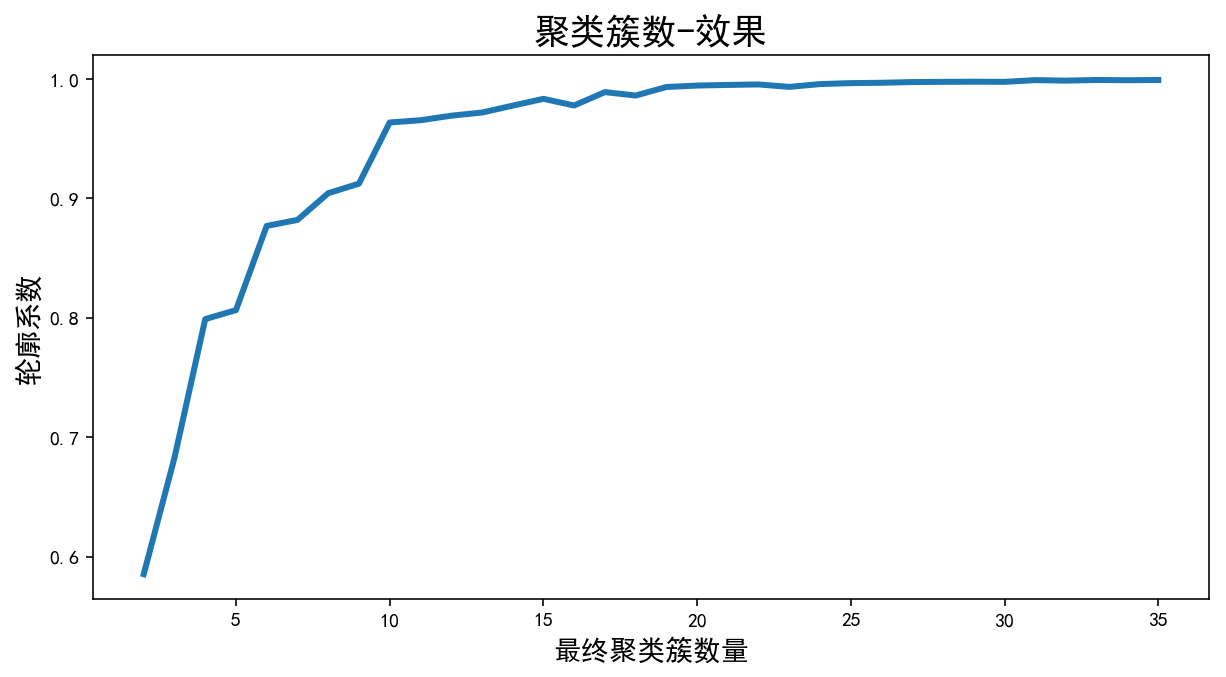

In [390]:
plt.figure(figsize=(10,5))
plt.plot(list(sk.keys()),list(sk.values()),linewidth=3)
plt.title('聚类簇数-效果',fontsize=18,fontweight='bold')
plt.xlabel('最终聚类簇数量',fontsize=14)
plt.ylabel('轮廓系数',fontsize=14)

**可以看到**
- 聚类簇数在达到10个簇之后，轮廓系数的增量就变得非常小了，从效率方面考虑，选择聚类为10个簇的性价比是最高的